Data Loader & Library Import

In [ ]:
'''
Library Import
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error,explained_variance_score
from google.colab import drive

'''
Dataset load from Google Drive
'''
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/MyDrive/Crab Research/Dataset/Water Dataset/Water_Parameter_2.csv')
print(df.iloc[:,:])

Mounted at /content/gdrive
     Temp  Salinity    DO      pH
0    25.3      20.4  7.01  7.9718
1    25.3      20.3  7.01  7.9644
2    24.9      20.9  7.12  7.9853
3    24.9      20.9  7.06  7.9835
4    24.9      21.1  6.96  7.9791
..    ...       ...   ...     ...
210  18.8      37.0  9.41  7.9800
211  18.8      36.0  7.80  7.8200
212  18.9      35.0  9.55  7.9600
213  18.9      36.0  9.36  7.7600
214  18.7      37.0  9.33  7.9900

[215 rows x 4 columns]


Data Preprocessing

In [ ]:
# Delete row with NaN data
data_cleaned = df.dropna()

# Delete outlier row using z-score
from scipy.stats import zscore
data_z = data_cleaned.apply(zscore)
data_no_outliers = data_cleaned[(np.abs(data_z) < 3).all(axis=1)]

print("Univariat Statistical Description:")
print(data_no_outliers.describe())

Univariat Statistical Description:
             Temp    Salinity          DO          pH
count  214.000000  214.000000  214.000000  214.000000
mean    23.004673   25.852336    6.235234    7.713822
std      2.808685    7.094987    3.384086    0.299086
min     17.700000   16.000000    1.330000    7.100000
25%     19.600000   20.500000    2.112500    7.368825
50%     25.000000   21.000000    7.010000    7.860000
75%     25.100000   35.000000    8.212500    7.970000
max     25.800000   39.000000   14.020000    8.190000


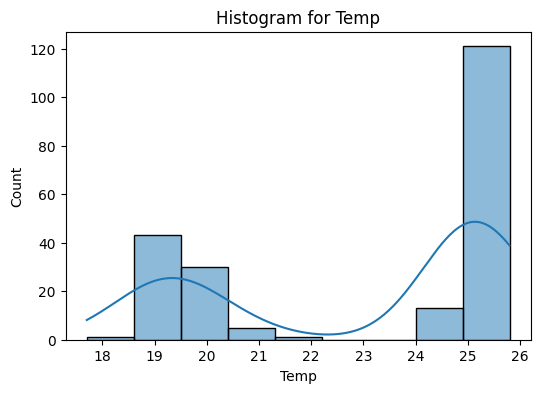

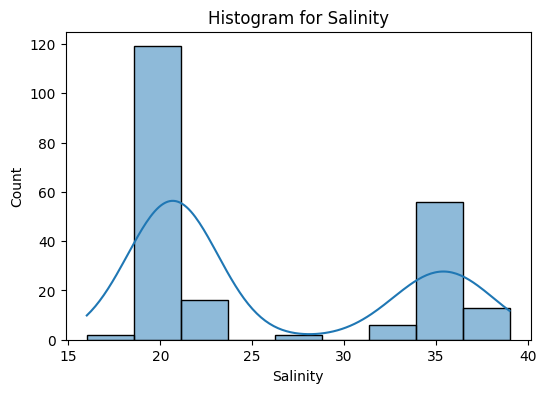

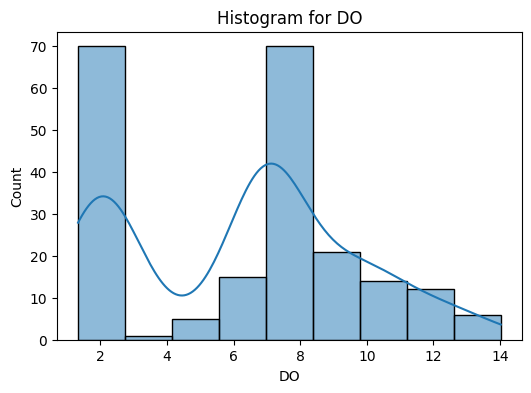

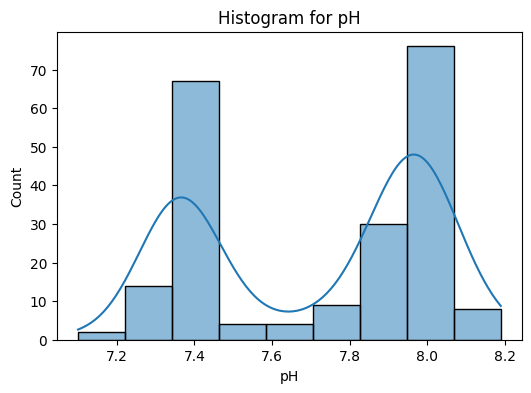

In [ ]:
#show data distribution
for column in data_no_outliers.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_no_outliers[column], kde=True)
    plt.title(f'Histogram for {column}')

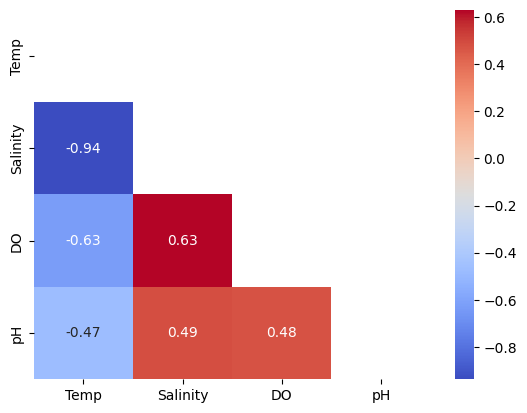

In [ ]:
#Bivariate analysis
correlation_matrix = data_no_outliers.corr()

#Correlation heatmap plotting
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
fig_full2 = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask).get_figure()

In [ ]:
'''
Dataset split to train and test dataset
'''
X = data_no_outliers.drop(columns=['Salinity']) #input feature data
y = data_no_outliers['Salinity']  #target feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training

In [ ]:
'''
Model Preparation
'''
models = {
    'SVR': SVR(kernel='rbf'),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100), max_iter=6000),
    'KNN': KNeighborsRegressor(n_neighbors=11),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(max_depth=3)
}

results = {}
predictions = {}

In [ ]:
'''
Model Training
'''
for model_name, model in models.items():
    # Melatih model
    model.fit(X_train, y_train)
    # Prediksi pada data testing
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred
    # Evaluasi
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    explained_var = explained_variance_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R2': r2, 'MAE' : mae, 'MAPE' :mape}

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
'''
Result extraction
'''
model_names = list(results.keys())
rmse_scores = [results[model]['RMSE'] for model in model_names]
r2_scores = [results[model]['R2'] for model in model_names]
mae_scores = [results[model]['MAE'] for model in model_names]
mape_scores = [results[model]['MAPE'] for model in model_names]

print(model_names)
print(rmse_scores)
print(mae_scores)
print(mape_scores)
print(r2_scores)

['SVR', 'Neural Network', 'KNN', 'Ridge Regression', 'Lasso Regression', 'Decision Tree Regression']
[1.778623769665606, 1.9144839416643935, 1.4482514459252716, 1.7558664631022152, 1.904499697674117, 1.340876408663215]
[1.1966687899411297, 1.0882489477555457, 0.7090909090909093, 1.3166364588931336, 1.3725892735831802, 0.6801380499345628]
[3.8709602409847936, 3.5713494975813727, 2.3611833599966894, 4.471598040850123, 4.385109082658882, 2.293245102742659]
[0.941679746403642, 0.9324298822592263, 0.9613331172598982, 0.9431626020173305, 0.9331328156978486, 0.9668541836604896]


Result Plot

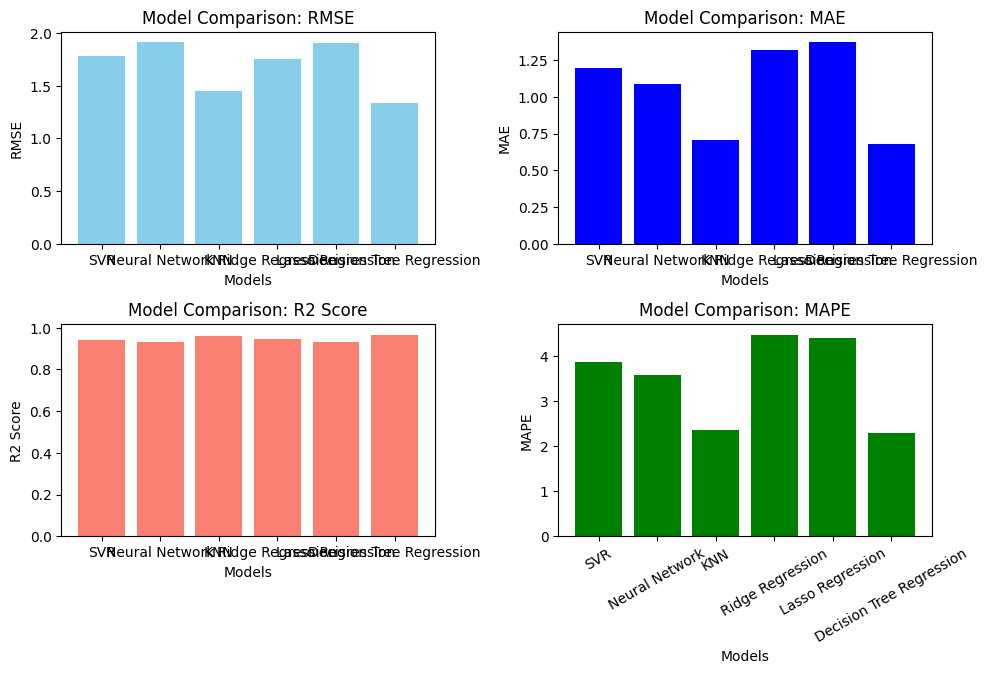

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6))

# Plot RMSE
ax[0,0].bar(model_names, rmse_scores, color='skyblue')
ax[0,0].set_xlabel('Models')
ax[0,0].set_ylabel('RMSE')
ax[0,0].set_title('Model Comparison: RMSE')

# Plot R2
ax[1,0].bar(model_names, r2_scores, color='salmon')
ax[1,0].set_xlabel('Models')
ax[1,0].set_ylabel('R2 Score')
ax[1,0].set_title('Model Comparison: R2 Score')

# Plot MAE
ax[0,1].bar(model_names, mae_scores, color='blue')
ax[0,1].set_xlabel('Models')
ax[0,1].set_ylabel('MAE')
ax[0,1].set_title('Model Comparison: MAE')

# Plot MAPE
ax[1,1].bar(model_names, mape_scores, color='green')
ax[1,1].set_xlabel('Models')
ax[1,1].set_ylabel('MAPE')
ax[1,1].set_title('Model Comparison: MAPE')

plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

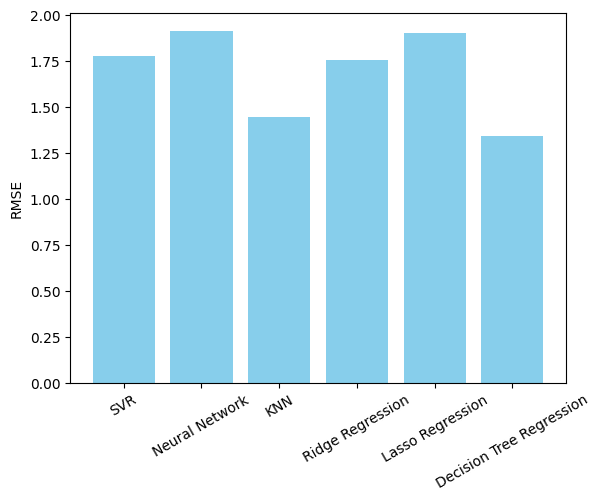

In [ ]:
plt.bar(model_names, rmse_scores, color='skyblue')
plt.ylabel('RMSE')
plt.xticks(rotation=30)
plt.show()

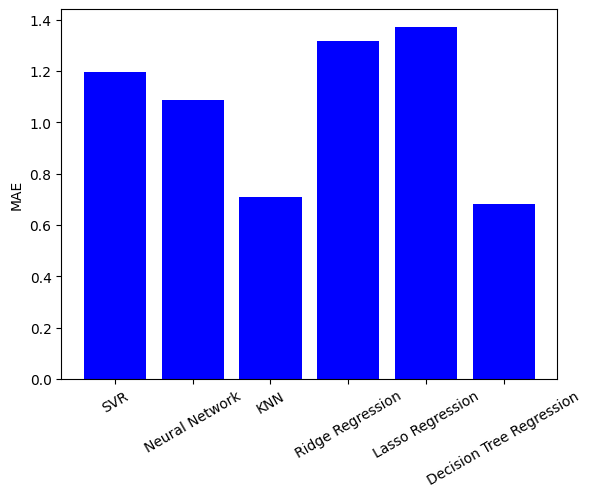

In [ ]:
plt.bar(model_names, mae_scores, color='blue')
plt.ylabel('MAE')
plt.xticks(rotation=30)
plt.show()

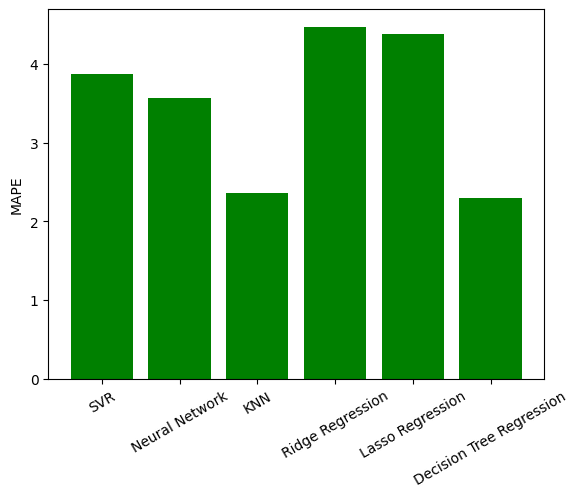

In [ ]:
plt.bar(model_names, mape_scores, color='green')
plt.ylabel('MAPE')
plt.xticks(rotation=30)
plt.show()

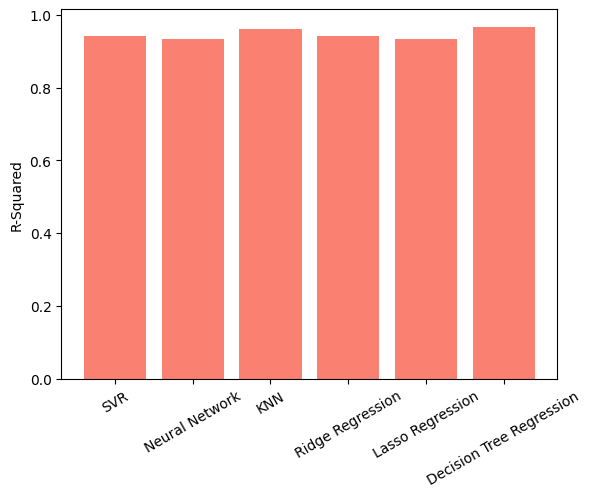

In [ ]:
plt.bar(model_names, r2_scores, color='salmon')
plt.ylabel('R-Squared')
plt.xticks(rotation=30)
plt.show()

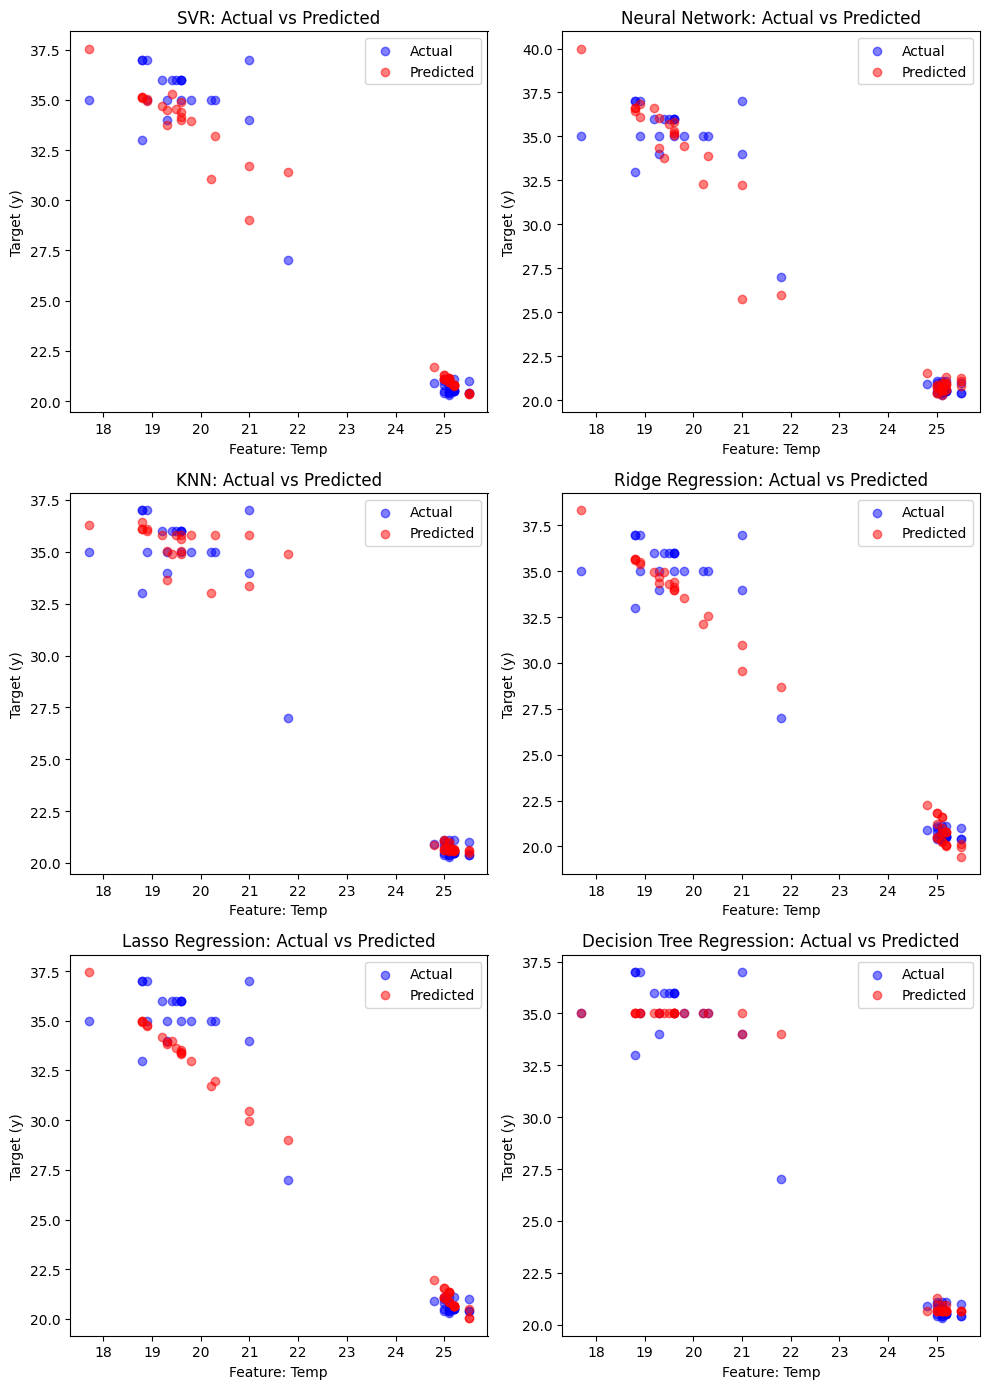

In [ ]:
selected_feature = X_test.iloc[:, 0]  # Menggunakan kolom pertama sebagai variabel x

fig, axes = plt.subplots(3, 2, figsize=(10, 14))
axes = axes.ravel()  # Flatten the array of axes for easy iteration

for idx, model_name in enumerate(models.keys()):
    ax = axes[idx]
    ax.scatter(selected_feature, y_test, color='blue', label='Actual', alpha=0.5)
    ax.scatter(selected_feature, predictions[model_name], color='red', label='Predicted', alpha=0.5)
    ax.set_xlabel('Feature: ' + X.columns[0])
    ax.set_ylabel('Target (y)')
    ax.set_title(f'{model_name}: Actual vs Predicted')
    ax.legend()

plt.tight_layout()
plt.show()

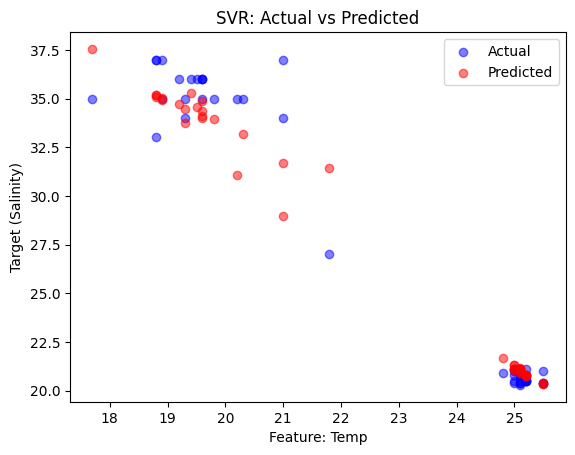

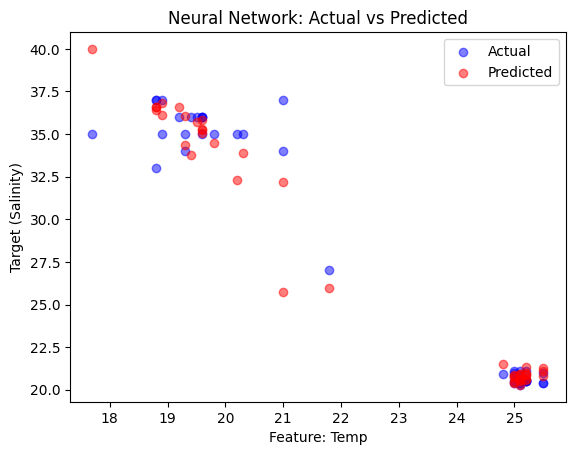

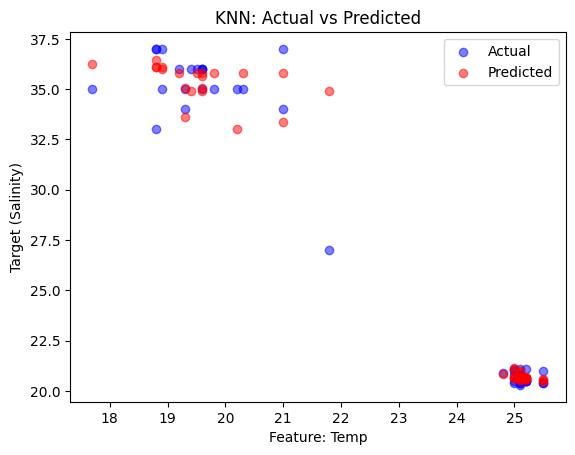

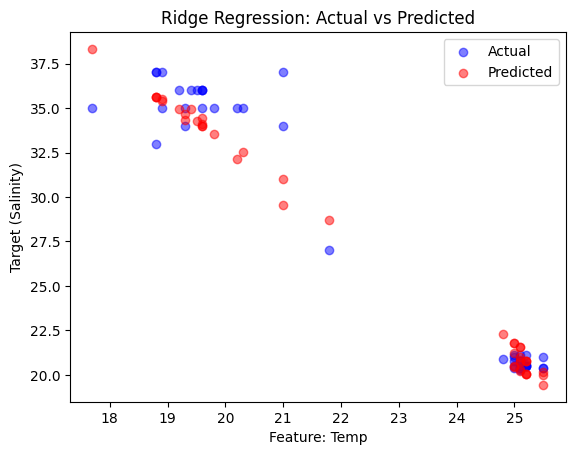

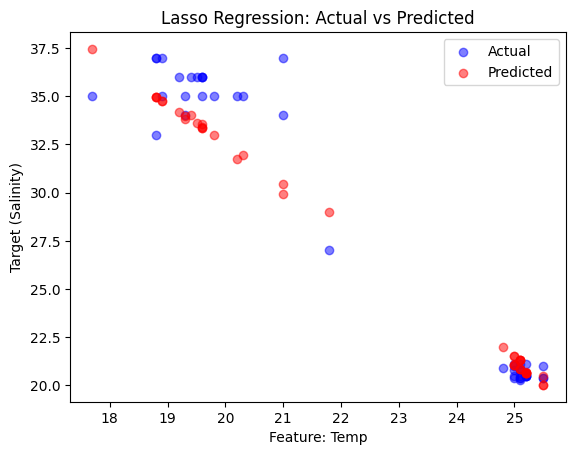

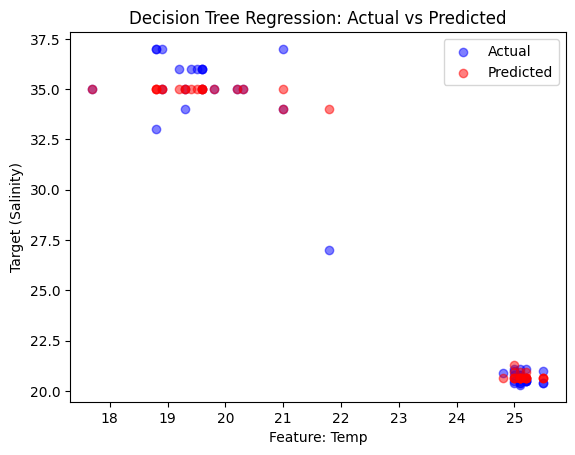

In [ ]:
for idx, model_name in enumerate(models.keys()):
    plt.scatter(selected_feature, y_test, color='blue', label='Actual', alpha=0.5)
    plt.scatter(selected_feature, predictions[model_name], color='red', label='Predicted', alpha=0.5)
    plt.xlabel('Feature: ' + X.columns[0])
    plt.ylabel('Target (Salinity)')
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.legend()
    plt.show()